In [42]:
!pip install kaggle

In [43]:
!kaggle datasets download -d lexset/synthetic-asl-alphabet


  0%|          | 0.00/6.58G [00:00<?, ?B/s]
  0%|          | 5.00M/6.58G [00:00<08:12, 14.3MB/s]
  0%|          | 9.00M/6.58G [00:00<05:36, 20.9MB/s]
  0%|          | 15.0M/6.58G [00:00<03:37, 32.4MB/s]
  0%|          | 20.0M/6.58G [00:01<07:11, 16.3MB/s]
  0%|          | 26.0M/6.58G [00:01<05:04, 23.1MB/s]
  0%|          | 32.0M/6.58G [00:01<03:54, 30.0MB/s]
  1%|          | 37.0M/6.58G [00:01<05:01, 23.3MB/s]
  1%|          | 43.0M/6.58G [00:01<03:57, 29.6MB/s]
  1%|          | 49.0M/6.58G [00:02<06:52, 17.0MB/s]
  1%|          | 55.0M/6.58G [00:02<05:16, 22.2MB/s]
  1%|          | 61.0M/6.58G [00:02<04:12, 27.7MB/s]
  1%|          | 67.0M/6.58G [00:02<03:29, 33.4MB/s]
  1%|1         | 73.0M/6.58G [00:02<02:59, 39.0MB/s]
  1%|1         | 79.0M/6.58G [00:03<02:38, 44.0MB/s]
  1%|1         | 85.0M/6.58G [00:04<07:47, 14.9MB/s]
  1%|1         | 91.0M/6.58G [00:04<05:59, 19.4MB/s]
  1%|1         | 97.0M/6.58G [00:04<04:44, 24.5MB/s]
  2%|1         | 103M/6.58G [00:04<03:52, 29.9MB/s] 
 

In [46]:
%mkdir data2

In [47]:
import shutil
filename="synthetic-asl-alphabet.zip"
extract_dir="./data2"
archive_format="zip"
shutil.unpack_archive(filename,extract_dir,archive_format)

In [17]:
import os

root_dir="./data2"

for dir in sorted(next(os.walk(root_dir))[1]):
    print(dir)
    subdir_1=os.path.join(root_dir,dir)
    for subdir1 in sorted(next(os.walk(subdir_1))[1]):
        print("      |---",subdir1)
        subdir_2=os.path.join(subdir_1,subdir1)
        for ind,subdir3 in enumerate(sorted(next(os.walk(subdir_2))[2])):
            if ind==3:
                break
            print("            |-----",subdir3)

Test_Alphabet
      |--- A
            |----- 081a8b28-7394-4254-95aa-e40f7c8989c8.rgb_0000.png
            |----- 09a13b4f-b68f-43fd-86e3-5644224490a2.rgb_0000.png
            |----- 09ea96a0-eb7b-4ce5-8a50-b33f345bc9ef.rgb_0000.png
      |--- B
            |----- 00e69efb-c8df-40a8-b951-4e167dc4fc5a.rgb_0000.png
            |----- 03314a4b-3f99-4159-8631-512b56bd7b90.rgb_0000.png
            |----- 0a408bd0-b67c-42c1-974a-cb700713f18a.rgb_0000.png
      |--- Blank
            |----- 002fc271-e07b-432e-a8a8-9087815803cf.rgb_0000.png
            |----- 0428dada-bb7a-4320-af69-a0722893a332.rgb_0000.png
            |----- 060e2ba6-04c7-4fd9-b14f-13aefaffb836.rgb_0000.png
      |--- C
            |----- 02409944-2e03-4882-83c9-238732fe18d2.rgb_0000.png
            |----- 02463aa0-3d03-49da-879b-0dd5665b0c7e.rgb_0000.png
            |----- 04b52b89-b7fc-4d6c-bc9f-ac2c6615ba94.rgb_0000.png
      |--- D
            |----- 0229ddc3-760f-4f42-9972-5d3993124113.rgb_0000.png
            |----- 0

In [18]:
label_dict={}
for ind, i in enumerate(range(65,92)):
    if ind==2:
        label_dict[ind]="Blank"
    elif ind<2:
        label_dict[ind]=chr(i)
    else:
        label_dict[ind]=chr(i-1)
label_dict

{0: 'A',
 1: 'B',
 2: 'Blank',
 3: 'C',
 4: 'D',
 5: 'E',
 6: 'F',
 7: 'G',
 8: 'H',
 9: 'I',
 10: 'J',
 11: 'K',
 12: 'L',
 13: 'M',
 14: 'N',
 15: 'O',
 16: 'P',
 17: 'Q',
 18: 'R',
 19: 'S',
 20: 'T',
 21: 'U',
 22: 'V',
 23: 'W',
 24: 'X',
 25: 'Y',
 26: 'Z'}

In [19]:
import pandas as pd
import os

labels_t={v:k for k,v in label_dict.items()}

paths=[]
labels=[]
label_gt=[]

# dirname = ./data2/Train_Alphabet/A
# filenames  = 0042513a-63c0-499f-a7f7-e6ee1266cb98.rgb_0000.png
def make_DF(root_dir):
    
    paths=[]
    labels=[]
    label_gt=[]
    
    for dirname,_,filenames in os.walk(root_dir):
        for filename in filenames:
            if ".png" in filename:
                filepath=os.path.join(dirname,filename)
                filepath=filepath.replace("\\","/")
                paths.append(filepath)
                dirname=dirname.replace("\\","/")
                label_name=dirname[dirname.rfind("/")+1:]
                labels.append(label_name)

                label_gt.append(labels_t[label_name])
                pd.set_option("max_colwidth",100)            

    data_df=pd.DataFrame({"path":paths,"label":labels,"label_gt":label_gt})
    return data_df
    
train_df=make_DF("./data2/Train_Alphabet")
test_df=make_DF("./data2/Test_Alphabet")

train_df.shape,test_df.shape

((24300, 3), (2700, 3))

In [20]:
train_df

,path,label,label_gt
0,./data2/Train_Alphabet/A/0042513a-63c0-499f-a7f7-e6ee1266cb98.rgb_0000.png,A,0
1,./data2/Train_Alphabet/A/00523102-a0df-4a94-b249-4f8c1c80f0b8.rgb_0000.png,A,0
2,./data2/Train_Alphabet/A/006f6ffe-d6eb-4a0c-a48c-bba3a4abb12d.rgb_0000.png,A,0
3,./data2/Train_Alphabet/A/00849d5c-b13d-4fec-ada9-0157c8e682d4.rgb_0000.png,A,0
4,./data2/Train_Alphabet/A/00961ff1-0a72-4af5-931d-a3079e78c4a9.rgb_0000.png,A,0
...,...,...,...
24295,./data2/Train_Alphabet/Z/ff27d99e-e479-43a8-bd2f-7d34ccdbcb7a.rgb_0000.png,Z,26
24296,./data2/Train_Alphabet/Z/ff29f829-0ab6-4c36-b074-306ef162ade6.rgb_0000.png,Z,26
24297,./data2/Train_Alphabet/Z/ff3d1ce9-de5f-4a86-b3ae-eced2fce83f1.rgb_0000.png,Z,26
24298,./data2/Train_Alphabet/Z/ff4b5fe7-78d6-4b44-b1c3-725a86d91fd8.rgb_0000.png,Z,26


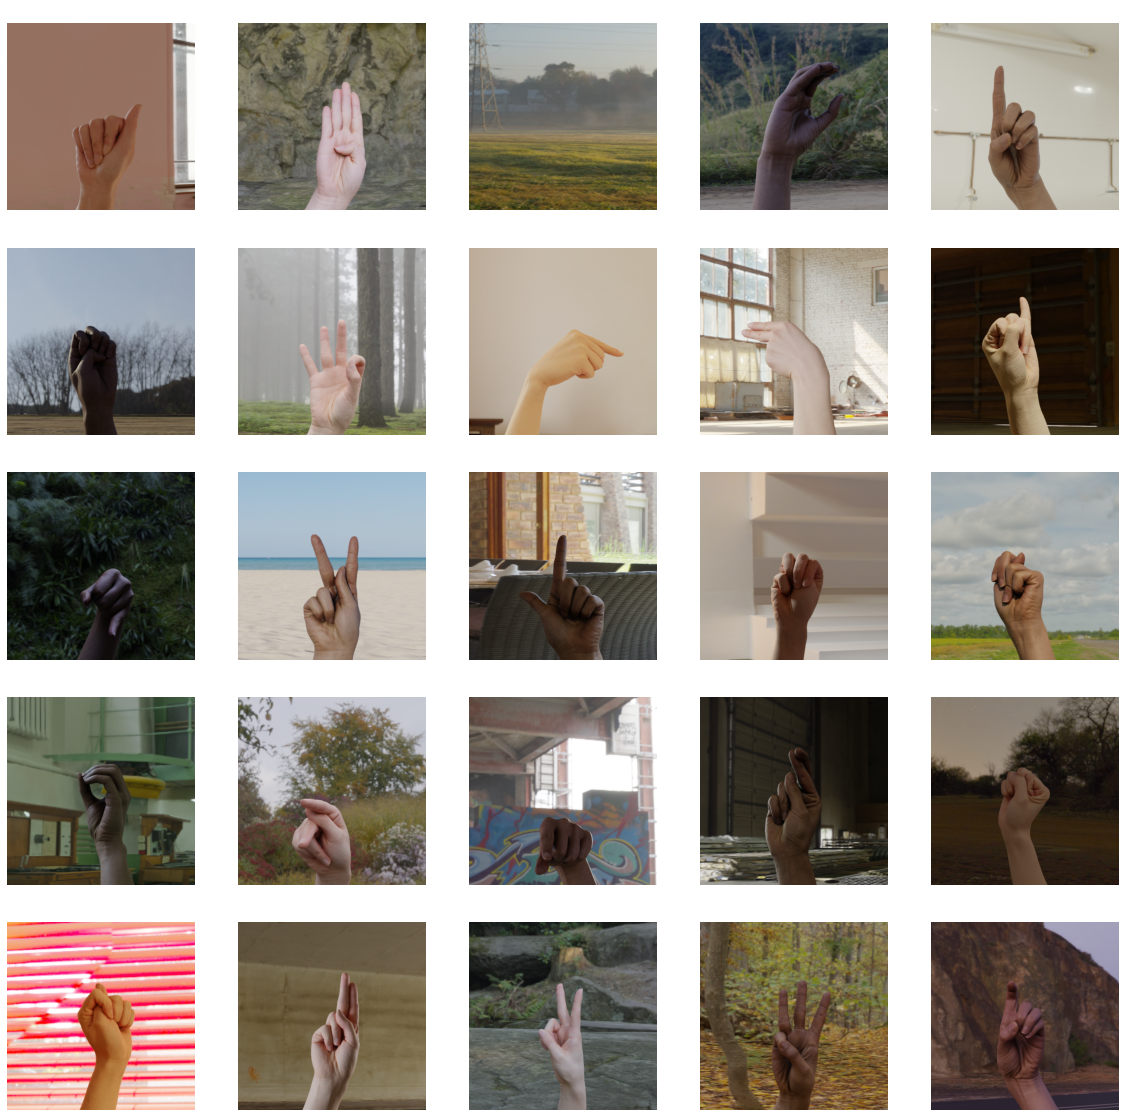

In [21]:
import cv2
import matplotlib.pyplot as plt

def show_image(df,augmentor):
    plt.figure(figsize=(20,20))
    for i in range(25):
        plt.subplot(5,5,i+1)
        imgpath=df["path"][900*i]
        img=cv2.cvtColor(cv2.imread(imgpath),cv2.COLOR_BGR2RGB)
        if augmentor is not None:
            img=augmentor(image=img)["image"]
        plt.title(label_dict[i], color='white', fontsize=12)
        plt.axis("off")
        plt.imshow(img)

show_image(train_df,None)

In [22]:
from sklearn.model_selection import train_test_split

train_path=train_df["path"].values
train_label=pd.get_dummies(train_df["label"]).values

test_path=test_df["path"].values
test_label=pd.get_dummies(test_df["label"]).values

tr_path,val_path,tr_label,val_label=train_test_split(train_path,train_label,stratify=train_df["label"],
                                                    test_size=0.35,random_state=2022)

print("tr_path shape : ",tr_path.shape, "tr_label shape : ",tr_label.shape,"\n"
      "val_path shape : ",val_path.shape,"val_label shape : ",val_label.shape,"\n"
      "test_path shape : ",test_path.shape,"test_label shape : ",test_label.shape)

tr_path shape :  (15795,) tr_label shape :  (15795, 27) 
val_path shape :  (8505,) val_label shape :  (8505, 27) 
test_path shape :  (2700,) test_label shape :  (2700, 27)


In [ ]:
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.layers import Flatten,Activation,Dropout,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import  ResNet50V2, MobileNet,VGG16,InceptionV3

def create_model(model_name,n_classes,is_print=True):
    
    input_tensor=Input(shape=(224,224,3))
    
    if model_name=="resnet":
        cnn_model=ResNet50V2(include_top=False, weights='imagenet', input_tensor=input_tensor)
        
        output_layer=cnn_model.output
    
        x = Flatten()(output_layer)
        x = Dense(256, activation='relu')(x)
        x  =Dropout(0.5)(x)
        
    elif model_name=="vgg":
        cnn_model=VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)
        
        output_layer=cnn_model.output
        
        x = Flatten()(output_layer)
        x = Dense(521, activation='relu')(x)
        x = Dropout(0.5)(x)
        x = Dense(256, activation='relu')(x)
        x = Dropout(0.5)(x)
        
    elif model_name=="inception":
        cnn_model=InceptionV3(include_top=False, weights='imagenet', input_tensor=input_tensor)
        
        output_layer=cnn_model.output
    
        x = Flatten()(output_layer)
        x = Dense(256, activation='relu')(x)
        x  =Dropout(0.5)(x)

    
        
    output=Dense(n_classes,activation="softmax")(x)
    
    model=Model(inputs=input_tensor,outputs=output)
       
    if is_print:
        model.summary()
    
    return model

In [33]:
vgg_model=create_model("vgg",27,is_print=True)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [25]:
resnet_model=create_model("resnet",27,is_print=True)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_8[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [34]:
incpetion_model=create_model("inception",27,is_print=True)

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 111, 111, 32  864         ['input_12[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_282 (Batch  (None, 111, 111, 32  96         ['conv2d_282[0][0]']             
 Normalization)                 )                                                          

In [27]:
from tensorflow.keras.utils import Sequence
import numpy as np
import cv2

BATCH_SIZE=64
IMG_SIZE=224

class ASLDataset(Sequence):
    def __init__(self,img_filename,labels,batch_size=BATCH_SIZE,img_size=IMG_SIZE
                 ,shuffle=False,augmentor=None,pre_func=None):
        self.img_filename=img_filename
        self.labels=labels
        self.batch_size=batch_size
        self.img_size=img_size
        self.shuffle=shuffle
        self.augmentor=augmentor
        self.pre_func=pre_func
        
    def __len__(self):
        return int(np.ceil(len(self.img_filename)/self.batch_size))
    
    def __getitem__(self,index):
        get_img_filename_batch=self.img_filename[index*self.batch_size:(index+1)*self.batch_size]
        if self.labels is not None:
            get_labels_batch=self.labels[index*self.batch_size:(index+1)*self.batch_size]
            
        resize_img_batch_board=np.zeros((get_img_filename_batch.shape[0],self.img_size,self.img_size,3))
        for img_index in range(get_img_filename_batch.shape[0]):
            img=cv2.cvtColor(cv2.imread(get_img_filename_batch[img_index]),cv2.COLOR_BGR2RGB)
            if self.augmentor is not None:
                img=self.augmentor(image=img)["image"]
            img=cv2.resize(img,(self.img_size,self.img_size))
            #img=img[:,:, np.newaxis]
            #print(img.shape)
            if self.pre_func is not None:
                img=self.pre_func(img)
            
            resize_img_batch_board[img_index]=img
            
        return resize_img_batch_board,get_labels_batch

In [28]:
import albumentations as A
augmentor = A.Compose([
    A.Blur(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.2),
    A.ShiftScaleRotate(p=0.5)
])

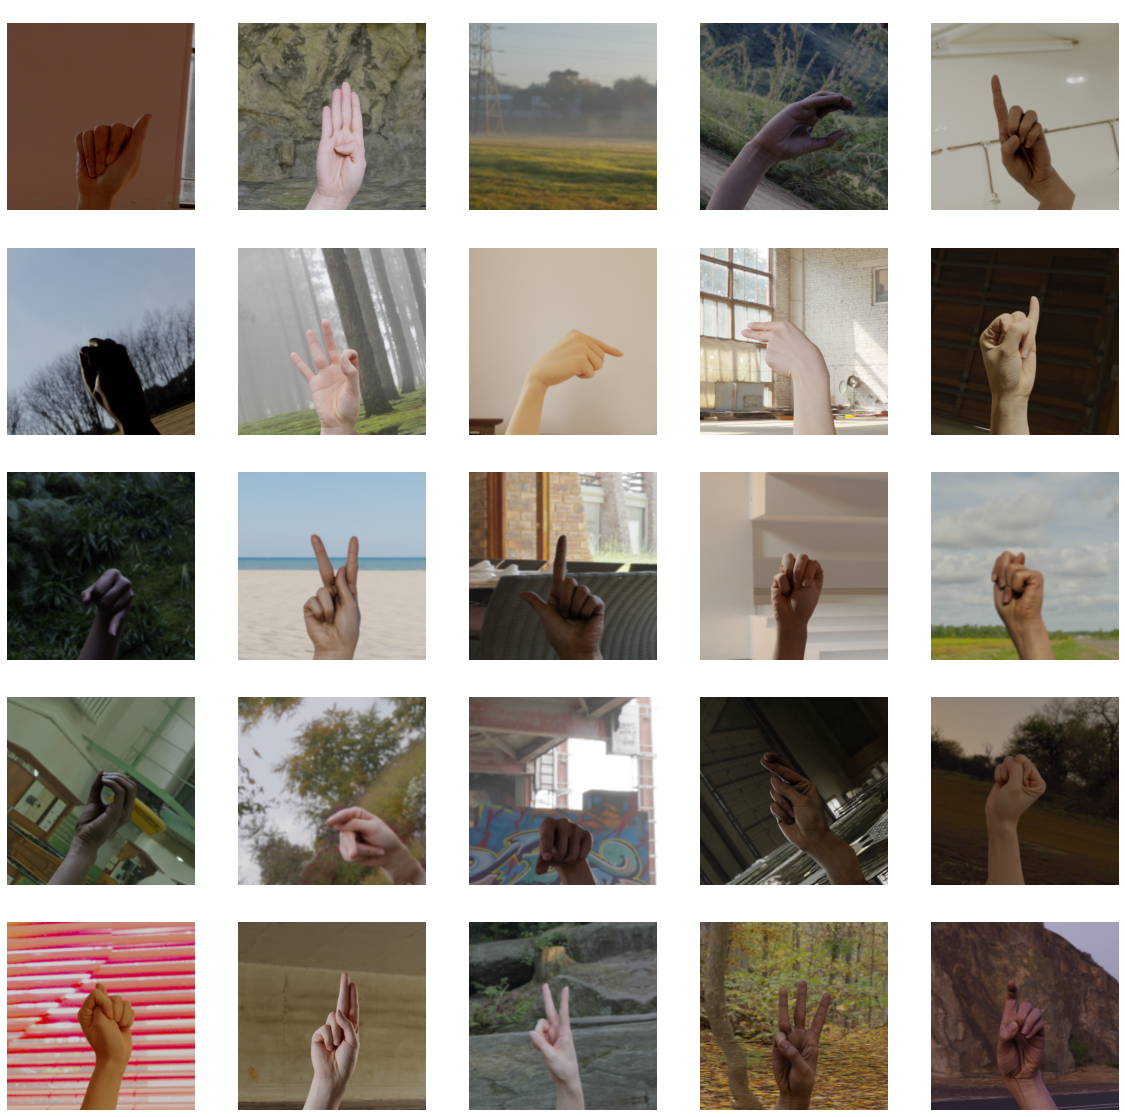

In [29]:
show_image(train_df,augmentor)

In [36]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess_input
import time

def train_model(model_name,is_print=False):

    if model_name=="resnet":
        pre_func=resnet_preprocess_input
    elif model_name=="vgg":
        pre_func=vgg_preprocess_input
    elif model_name=="inception":
        pre_func=inception_preprocess_input

    tr_ds=ASLDataset(tr_path,tr_label,batch_size=BATCH_SIZE,img_size=IMG_SIZE,
                 shuffle=True,augmentor=augmentor,pre_func=pre_func)
    val_ds=ASLDataset(val_path,val_label,batch_size=BATCH_SIZE,img_size=IMG_SIZE,
                  shuffle=False,augmentor=None,pre_func=pre_func)
    test_ds=ASLDataset(test_path,test_label,batch_size=BATCH_SIZE,img_size=IMG_SIZE,
              shuffle=False,augmentor=None,pre_func=pre_func)

    tr_img_array=next(iter(tr_ds))[0]
    tr_labe_array=next(iter(tr_ds))[1]
    
    val_img_array=next(iter(val_ds))[0]
    val_labe_array=next(iter(val_ds))[1]

    test_img_array=next(iter(test_ds))[0]
    test_labe_array=next(iter(test_ds))[1]
    
    if is_print:
        print(tr_img_array.shape,tr_labe_array.shape)
        print(val_img_array.shape,val_labe_array.shape)
        print(test_img_array.shape,test_labe_array.shape)
    
    FIRST_EPOCHS = 5
    SECOND_EPOCHS = 5
    
    model=create_model(model_name,27,is_print=False)

    rly_cb=ReduceLROnPlateau(factor=0.2,monitor="val_loss",mode="min",patience=3,verbose=1)
    ely_cb=EarlyStopping(monitor="val_loss",mode="min",patience=5,verbose=1)
    
    if model_name!="vgg":
        
        model.compile(optimizer=Adam(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
        
        for layer in model.layers[:-3]:
            layer.trainable=False

        history = model.fit(tr_ds, epochs=FIRST_EPOCHS,validation_data=val_ds,verbose=1,callbacks=[ely_cb,rly_cb])

        for layer in model.layers:
            if not not isinstance(layer, layers.BatchNormalization):
                layer.trainable = True

        model.compile(optimizer=Adam(0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

        start_time=time.time()
        history = model.fit(tr_ds, epochs=SECOND_EPOCHS,validation_data=val_ds,verbose=1,callbacks=[ely_cb,rly_cb])
        train_time=time.time()-start_time
        
    else:
        model.compile(optimizer=Adam(0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
        
        start_time=time.time()
        history = model.fit(tr_ds, epochs=5,validation_data=val_ds,verbose=1,callbacks=[ely_cb,rly_cb])
        train_time=time.time()-start_time

    
    return model, history, test_ds, train_time

In [37]:
print("## VGG16") 
vgg_model, vgg_history, vgg_test_ds,vgg_training_time=train_model("vgg")
print(vgg_training_time)
vgg_model.save("vgg_model.h5")    

## VGG16
Epoch 1/5
247/247 [==============================] - 175s 705ms/step - loss: 3.3866 - accuracy: 0.0354 - val_loss: 3.2960 - val_accuracy: 0.0357 - lr: 1.0000e-04
Epoch 2/5
247/247 [==============================] - 171s 690ms/step - loss: 3.2960 - accuracy: 0.0390 - val_loss: 3.2943 - val_accuracy: 0.0420 - lr: 1.0000e-04
Epoch 3/5
247/247 [==============================] - 163s 658ms/step - loss: 2.5507 - accuracy: 0.2581 - val_loss: 0.4925 - val_accuracy: 0.8798 - lr: 1.0000e-04
Epoch 4/5
247/247 [==============================] - 172s 695ms/step - loss: 0.8225 - accuracy: 0.7556 - val_loss: 0.0573 - val_accuracy: 0.9852 - lr: 1.0000e-04
Epoch 5/5
247/247 [==============================] - 163s 659ms/step - loss: 0.3579 - accuracy: 0.8898 - val_loss: 0.0422 - val_accuracy: 0.9877 - lr: 1.0000e-04
843.5361244678497


In [ ]:
print("## ResNet50V2")
resnet_model, resnet_history, resnet_training_time, resnet_test_ds=train_model("resnet")
resnet_model.save("resnet_model.h5")

In [ ]:
print("## InceptionV3")
inception_model, inception_history, inception_training_time, inception_test_ds=train_model("inception")
inception_model.save("inception_model.h5")

In [40]:
pred=vgg_model.predict(vgg_test_ds)

In [41]:
pred_classes=np.argmax(pred,axis=1)
pred_classes

array([ 0,  0,  0, ..., 26, 26, 26], dtype=int64)

In [42]:
test_df["label_pre"]=pred_classes

In [43]:
test_df

,path,label,label_gt,label_pre
0,./data2/Test_Alphabet/A/081a8b28-7394-4254-95aa-e40f7c8989c8.rgb_0000.png,A,0,0
1,./data2/Test_Alphabet/A/09a13b4f-b68f-43fd-86e3-5644224490a2.rgb_0000.png,A,0,0
2,./data2/Test_Alphabet/A/09ea96a0-eb7b-4ce5-8a50-b33f345bc9ef.rgb_0000.png,A,0,0
3,./data2/Test_Alphabet/A/0de66b7e-1449-4079-bf2c-935ec261ddcb.rgb_0000.png,A,0,0
4,./data2/Test_Alphabet/A/103a0979-29c7-4519-b341-1d58e3156f92.rgb_0000.png,A,0,0
...,...,...,...,...
2695,./data2/Test_Alphabet/Z/f60f518a-c8b0-4d38-838a-b5a71025122a.rgb_0000.png,Z,26,26
2696,./data2/Test_Alphabet/Z/fbdcddd1-f4f7-4110-8e38-d5b14d96bf94.rgb_0000.png,Z,26,26
2697,./data2/Test_Alphabet/Z/fd007a3c-8690-4025-ad7a-396f75bff479.rgb_0000.png,Z,26,26
2698,./data2/Test_Alphabet/Z/fe7beb8c-6ddd-44a4-973d-9949c25d9a5a.rgb_0000.png,Z,26,26


In [44]:
import pandas as pd

a=test_df[test_df['label_gt'] != test_df['label_pre']]["label"].value_counts()
b=test_df["label"].value_counts()
#df=pd.DataFrame({"x":a,"o":})     
#df
a

G        17
Q         4
T         3
B         2
H         2
W         2
X         2
A         1
Blank     1
N         1
O         1
P         1
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

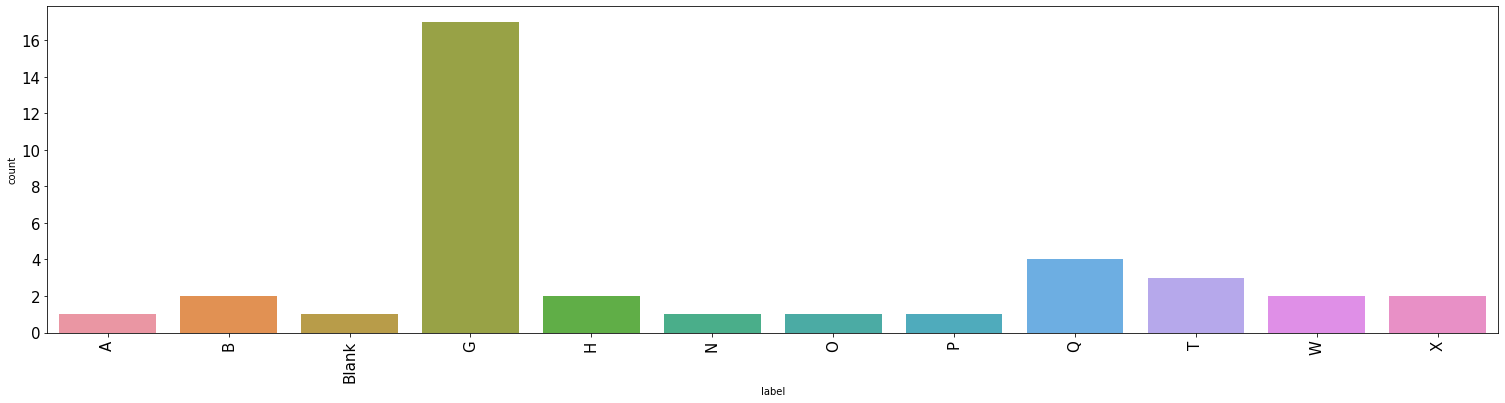

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(26, 6))
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)

wrong_result_df =test_df[test_df['label_gt'] != test_df['label_pre']]

sns.countplot(data=wrong_result_df, x='label')